In [10]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

import re
from acquire import extract, build_extracted_df, get_new_patch_data, get_players
from prepare import prepare
from env import api_key

In [30]:
bluecolumns = ['BlueTopAssists_scaled',
'BlueJungleAssists_scaled',
'BlueMidAssists_scaled',
'BlueADCAssists_scaled',
'BlueSupportAssists_scaled',
'BlueTeamRiftHeralds_scaled',
'BlueTeamTowersLost_scaled',
'BlueTopCurrentGold_scaled',
'BlueJungleCurrentGold_scaled',
'BlueMidCurrentGold_scaled',
'BlueADCCurrentGold_scaled',
'BlueSupportCurrentGold_scaled',
'BlueTopDeaths_scaled',
'BlueJungleDeaths_scaled',
'BlueMidDeaths_scaled',
'BlueADCDeaths_scaled',
'BlueSupportDeaths_scaled',
'BlueTeamDragons_scaled',
'BlueTeamEarthDragon_scaled',
'BlueTeamFireDragon_scaled',
'BlueTeamHextechDragon_scaled',
'BlueTeamWaterDragon_scaled',
'BlueTeamChemtechDragon_scaled',
'BlueTeamAirDragon_scaled',
'BlueTopgoldPerSecond_scaled',
'BlueJunglegoldPerSecond_scaled',
'BlueMidgoldPerSecond_scaled',
'BlueADCgoldPerSecond_scaled',
'BlueSupportgoldPerSecond_scaled',
'BlueTopJungleMinionsKilled_scaled',
'BlueJungleJungleMinionsKilled_scaled',
'BlueMidJungleMinionsKilled_scaled',
'BlueADCJungleMinionsKilled_scaled',
'BlueSupportJungleMinionsKilled_scaled',
'BlueTopKills_scaled',
'BlueJungleKills_scaled',
'BlueMidKills_scaled',
'BlueADCKills_scaled',
'BlueSupportKills_scaled',
'BlueTopLevel_scaled',
'BlueJungleLevel_scaled',
'BlueMidLevel_scaled',
'BlueADCLevel_scaled',
'BlueSupportLevel_scaled',
'BlueTopMagicDamageDoneToChampions_scaled',
'BlueJungleMagicDamageDoneToChampions_scaled',
'BlueMidMagicDamageDoneToChampions_scaled',
'BlueADCMagicDamageDoneToChampions_scaled',
'BlueSupportMagicDamageDoneToChampions_scaled',
'BlueTopMinionsKilled_scaled',
'BlueJungleMinionsKilled_scaled',
'BlueMidMinionsKilled_scaled',
'BlueADCMinionsKilled_scaled',
'BlueSupportMinionsKilled_scaled',
'BlueTopPhysicalDamageDoneToChampions_scaled',
'BlueJunglePhysicalDamageDoneToChampions_scaled',
'BlueMidPhysicalDamageDoneToChampions_scaled',
'BlueADCPhysicalDamageDoneToChampions_scaled',
'BlueSupportPhysicalDamageDoneToChampions_scaled',
'BlueTopTimeEnemySpentControlled_scaled',
'BlueJungleTimeEnemySpentControlled_scaled',
'BlueMidTimeEnemySpentControlled_scaled',
'BlueADCTimeEnemySpentControlled_scaled',
'BlueSupportTimeEnemySpentControlled_scaled',
'BlueTopTotalDamageDoneToChampions_scaled',
'BlueJungleTotalDamageDoneToChampions_scaled',
'BlueMidTotalDamageDoneToChampions_scaled',
'BlueADCTotalDamageDoneToChampions_scaled',
'BlueSupportTotalDamageDoneToChampions_scaled',
'BlueTopTotalGold_scaled',
'BlueJungleTotalGold_scaled',
'BlueMidTotalGold_scaled',
'BlueADCTotalGold_scaled',
'BlueSupportTotalGold_scaled',
'BlueTopTrueDamageDoneToChampions_scaled',
'BlueJungleTrueDamageDoneToChampions_scaled',
'BlueMidTrueDamageDoneToChampions_scaled',
'BlueADCTrueDamageDoneToChampions_scaled',
'BlueSupportTrueDamageDoneToChampions_scaled',
'BlueTopWard_scaled',
'BlueJungleWard_scaled',
'BlueMidWard_scaled',
'BlueADCWard_scaled',
'BlueSupportWard_scaled',
'BlueTopXp_scaled',
'BlueJungleXp_scaled',
'BlueMidXp_scaled',
'BlueADCXp_scaled',
'BlueSupportXp_scaled']

In [31]:
# red team stats
redcolumns = ['RedTopAssists_scaled',
'RedJungleAssists_scaled',
'RedMidAssists_scaled',
'RedADCAssists_scaled',
'RedSupportAssists_scaled',
'RedTeamInhibsLost_scaled',
'RedTeamRiftHeralds_scaled',
'RedTeamTowersLost_scaled',
'RedTopCurrentGold_scaled',
'RedJungleCurrentGold_scaled',
'RedMidCurrentGold_scaled',
'RedADCCurrentGold_scaled',
'RedSupportCurrentGold_scaled',
'RedTopDeaths_scaled',
'RedJungleDeaths_scaled',
'RedMidDeaths_scaled',
'RedADCDeaths_scaled',
'RedSupportDeaths_scaled',
'RedTeamDragons_scaled',
'RedTeamEarthDragon_scaled',
'RedTeamFireDragon_scaled',
'RedTeamHextechDragon_scaled',
'RedTeamWaterDragon_scaled',
'RedTeamChemtechDragon_scaled',
'RedTeamAirDragon_scaled',
'RedTopgoldPerSecond_scaled',
'RedJunglegoldPerSecond_scaled',
'RedMidgoldPerSecond_scaled',
'RedADCgoldPerSecond_scaled',
'RedSupportgoldPerSecond_scaled',
'RedTopJungleMinionsKilled_scaled',
'RedJungleJungleMinionsKilled_scaled',
'RedMidJungleMinionsKilled_scaled',
'RedADCJungleMinionsKilled_scaled',
'RedSupportJungleMinionsKilled_scaled',
'RedTopKills_scaled',
'RedJungleKills_scaled',
'RedMidKills_scaled',
'RedADCKills_scaled',
'RedSupportKills_scaled',
'RedTopLevel_scaled',
'RedJungleLevel_scaled',
'RedMidLevel_scaled',
'RedADCLevel_scaled',
'RedSupportLevel_scaled',
'RedTopMagicDamageDoneToChampions_scaled',
'RedJungleMagicDamageDoneToChampions_scaled',
'RedMidMagicDamageDoneToChampions_scaled',
'RedADCMagicDamageDoneToChampions_scaled',
'RedSupportMagicDamageDoneToChampions_scaled',
'RedTopMinionsKilled_scaled',
'RedJungleMinionsKilled_scaled',
'RedMidMinionsKilled_scaled',
'RedADCMinionsKilled_scaled',
'RedSupportMinionsKilled_scaled',
'RedTopPhysicalDamageDoneToChampions_scaled',
'RedJunglePhysicalDamageDoneToChampions_scaled',
'RedMidPhysicalDamageDoneToChampions_scaled',
'RedADCPhysicalDamageDoneToChampions_scaled',
'RedSupportPhysicalDamageDoneToChampions_scaled',
'RedTopTimeEnemySpentControlled_scaled',
'RedJungleTimeEnemySpentControlled_scaled',
'RedMidTimeEnemySpentControlled_scaled',
'RedADCTimeEnemySpentControlled_scaled',
'RedSupportTimeEnemySpentControlled_scaled',
'RedTopTotalDamageDoneToChampions_scaled',
'RedJungleTotalDamageDoneToChampions_scaled',
'RedMidTotalDamageDoneToChampions_scaled',
'RedADCTotalDamageDoneToChampions_scaled',
'RedSupportTotalDamageDoneToChampions_scaled',
'RedTopTotalGold_scaled',
'RedJungleTotalGold_scaled',
'RedMidTotalGold_scaled',
'RedADCTotalGold_scaled',
'RedSupportTotalGold_scaled',
'RedTopTrueDamageDoneToChampions_scaled',
'RedJungleTrueDamageDoneToChampions_scaled',
'RedMidTrueDamageDoneToChampions_scaled',
'RedADCTrueDamageDoneToChampions_scaled',
'RedSupportTrueDamageDoneToChampions_scaled',
'RedTopWard_scaled',
'RedJungleWard_scaled',
'RedMidWard_scaled',
'RedADCWard_scaled',
'RedSupportWard_scaled',
'RedTopXp_scaled',
'RedJungleXp_scaled',
'RedMidXp_scaled',
'RedADCXp_scaled',
'RedSupportXp_scaled']

In [32]:
# Team Stats
teamstats =[
'BlueTeamDeaths_scaled',
'RedTeamDeaths_scaled',
'BlueTeamGoldPerSec_scaled',
'RedTeamGoldPerSec_scaled',
'BlueTeamJungleMinionsKilled_scaled',
'RedTeamJungleMinionsKilled_scaled',
'BlueTeamKills_scaled',
'RedTeamKills_scaled',
'BlueTeamLevel_scaled',
'RedTeamLevel_scaled',
'BlueTeamMagicDamageDoneToChampions_scaled',
'RedTeamMagicDamageDoneToChampions_scaled',
'BlueTeamMinionsKilled_scaled',
'RedTeamMinionsKilled_scaled',
'BlueTeamPhysicalDamageDoneToChampions_scaled',
'RedTeamPhysicalDamageDoneToChampions_scaled',
'BlueTeamTimeEnemySpentControlled_scaled',
'RedTeamTimeEnemySpentControlled_scaled',
'BlueTeamTotalDamageDoneToChampions_scaled',
'RedTeamTotalDamageDoneToChampions_scaled',
'BlueTeamTotalGold_scaled',
'RedTeamTotalGold_scaled',
'BlueTeamTrueDamageDoneToChampions_scaled',
'RedTeamTrueDamageDoneToChampions_scaled',
'BlueTeamWards_scaled',
'RedTeamWards_scaled',
'BlueTeamAssists_scaled',
'RedTeamAssists_scaled',
'BlueTeamXp_scaled',
'RedTeamXp_scaled',
'BlueTeamTotalGoldDifference_scaled',
'RedTeamTotalGoldDifference_scaled']

In [33]:
def create_clusters(features, train):
    '''
    Where X are the features and train is Well...Train
    '''
    # Creating X passing in the desired features
    X = train[features]

    #define the thing
    kmeans = KMeans(n_clusters=3, random_state=1349)

    # fit the thing
    kmeans.fit(X)

    # Use (predict using) the thing 
    kmeans.predict(X)
    
    # make a new column names cluster in iris and X_scaled dataframe
    df = pd.DataFrame()
    df['cluster'] = kmeans.predict(X)

    X['cluster'] = kmeans.predict(X)
    print(X.cluster.value_counts())
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(9, 6))
        pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
        plt.xticks(range(2, 12))
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title('Change in inertia as k increases')
        
   
    return df

In [34]:
def reset_train():
    train = pd.read_csv('final10_train_scaled.csv')

    test = pd.read_csv('final10_test_scaled.csv')

    train = train.drop(columns=['Unnamed: 0'])
    test = test.drop(columns=['Unnamed: 0'])
    return train, test

In [61]:
train, test = reset_train()

<ipython-input-33-c87b31b6a272>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


0    2093
1    1090
2     707
Name: cluster, dtype: int64


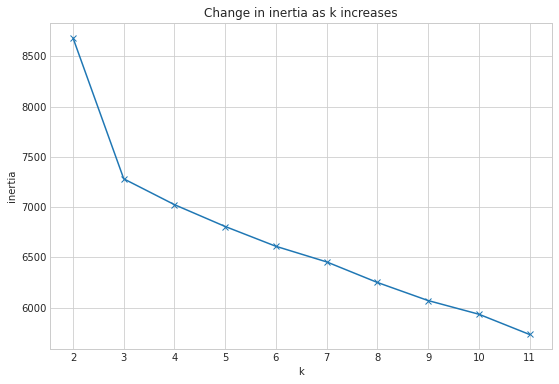

In [62]:
df1 = create_clusters(bluecolumns, train)

<ipython-input-33-c87b31b6a272>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


1    2002
2    1202
0     686
Name: cluster, dtype: int64


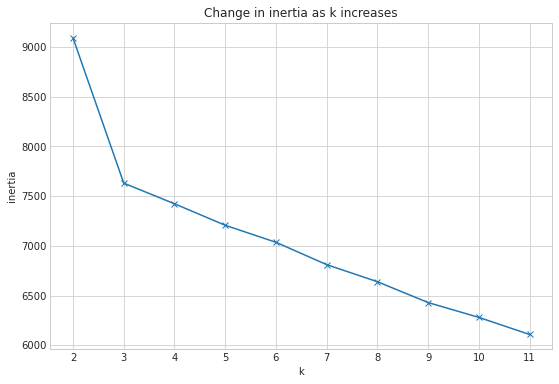

In [63]:
df2 = create_clusters(redcolumns, train)

<ipython-input-33-c87b31b6a272>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


0    1517
1    1200
2    1173
Name: cluster, dtype: int64


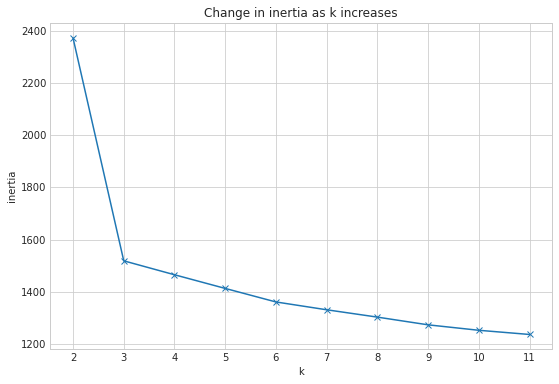

In [64]:
df3 = create_clusters(teamstats, train)

In [66]:
train = pd.concat([train, df1], axis = 1)
boolean_dummy = pd.get_dummies(train['cluster'], drop_first=False)
train = pd.concat([train, boolean_dummy], axis = 1)

In [67]:
train = train.rename(columns = {
            0:'blue_cluster_0', 
            1:'blue_cluster_1',
            2:'blue_cluster_2',
            'cluster':'blue_cluster'})

In [68]:
train

,winningTeam,BlueTeamAirDragon_scaled,BlueTopAssists_scaled,RedSupportAssists_scaled,BlueJungleAssists_scaled,BlueMidAssists_scaled,BlueADCAssists_scaled,BlueSupportAssists_scaled,RedTopAssists_scaled,RedJungleAssists_scaled,...,RedBotKda_scaled,RedSupportKda_scaled,BlueTeamKdaDifference_scaled,BlueJungleGankHeavy_scaled,RedJungleGankHeavy_scaled,BlueTeamJungleDiffy_scaled,blue_cluster,blue_cluster_0,blue_cluster_1,blue_cluster_2
0,200.0,0.0,0.111111,0.000000,0.125,0.125,0.500,0.166667,0.090909,0.0,...,0.283951,0.314286,0.652542,0.298319,0.194764,0.551422,1,0,1,0
1,200.0,0.0,0.111111,0.000000,0.000,0.375,0.000,0.416667,0.000000,0.3,...,0.320988,0.285714,0.601695,0.298319,0.090052,0.606127,2,0,0,1
2,100.0,0.0,0.111111,0.090909,0.125,0.000,0.125,0.166667,0.090909,0.1,...,0.259259,0.328571,0.686441,0.126050,0.140314,0.490153,1,0,1,0
3,200.0,0.0,0.111111,0.545455,0.375,0.125,0.000,0.333333,0.090909,0.0,...,0.481481,0.500000,0.550847,0.348739,0.131937,0.610503,0,1,0,0
4,100.0,0.0,0.111111,0.181818,0.250,0.250,0.375,0.166667,0.000000,0.2,...,0.555556,0.342857,0.567797,0.256303,0.141361,0.557440,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,200.0,0.0,0.333333,0.181818,0.125,0.000,0.125,0.416667,0.000000,0.2,...,0.283951,0.385714,0.720339,0.352941,0.154974,0.600656,0,1,0,0
3886,200.0,0.0,0.222222,0.454545,0.125,0.000,0.125,0.083333,0.000000,0.6,...,0.432099,0.714286,0.245763,0.252101,0.043979,0.606127,0,1,0,0
3887,100.0,0.0,0.222222,0.181818,0.250,0.000,0.250,0.166667,0.363636,0.0,...,0.345679,0.371429,0.483051,0.449580,0.664921,0.384573,0,1,0,0
3888,100.0,0.0,0.000000,0.000000,0.125,0.000,0.250,0.250000,0.000000,0.1,...,0.271605,0.228571,0.516949,0.126050,0.341361,0.385120,1,0,1,0


In [69]:
train = pd.concat([train, df2], axis = 1)
boolean_dummy = pd.get_dummies(train['cluster'], drop_first=False)
train = pd.concat([train, boolean_dummy], axis = 1)

In [70]:
train = train.rename(columns = {
            0:'red_cluster_0', 
            1:'red_cluster_1',
            2:'red_cluster_2',
            'cluster': 'red_cluster'})

In [71]:
train

,winningTeam,BlueTeamAirDragon_scaled,BlueTopAssists_scaled,RedSupportAssists_scaled,BlueJungleAssists_scaled,BlueMidAssists_scaled,BlueADCAssists_scaled,BlueSupportAssists_scaled,RedTopAssists_scaled,RedJungleAssists_scaled,...,RedJungleGankHeavy_scaled,BlueTeamJungleDiffy_scaled,blue_cluster,blue_cluster_0,blue_cluster_1,blue_cluster_2,red_cluster,red_cluster_0,red_cluster_1,red_cluster_2
0,200.0,0.0,0.111111,0.000000,0.125,0.125,0.500,0.166667,0.090909,0.0,...,0.194764,0.551422,1,0,1,0,0,1,0,0
1,200.0,0.0,0.111111,0.000000,0.000,0.375,0.000,0.416667,0.000000,0.3,...,0.090052,0.606127,2,0,0,1,0,1,0,0
2,100.0,0.0,0.111111,0.090909,0.125,0.000,0.125,0.166667,0.090909,0.1,...,0.140314,0.490153,1,0,1,0,1,0,1,0
3,200.0,0.0,0.111111,0.545455,0.375,0.125,0.000,0.333333,0.090909,0.0,...,0.131937,0.610503,0,1,0,0,2,0,0,1
4,100.0,0.0,0.111111,0.181818,0.250,0.250,0.375,0.166667,0.000000,0.2,...,0.141361,0.557440,0,1,0,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,200.0,0.0,0.333333,0.181818,0.125,0.000,0.125,0.416667,0.000000,0.2,...,0.154974,0.600656,0,1,0,0,1,0,1,0
3886,200.0,0.0,0.222222,0.454545,0.125,0.000,0.125,0.083333,0.000000,0.6,...,0.043979,0.606127,0,1,0,0,2,0,0,1
3887,100.0,0.0,0.222222,0.181818,0.250,0.000,0.250,0.166667,0.363636,0.0,...,0.664921,0.384573,0,1,0,0,2,0,0,1
3888,100.0,0.0,0.000000,0.000000,0.125,0.000,0.250,0.250000,0.000000,0.1,...,0.341361,0.385120,1,0,1,0,1,0,1,0


In [72]:
train = pd.concat([train, df3], axis = 1)
boolean_dummy = pd.get_dummies(train['cluster'], drop_first=False)
train = pd.concat([train, boolean_dummy], axis = 1)

In [73]:
train = train.rename(columns = {
            0:'team_cluster_0', 
            1:'team_cluster_1',
            2:'team_cluster_2',
            'cluster': 'team_cluster'})

In [74]:
train

,winningTeam,BlueTeamAirDragon_scaled,BlueTopAssists_scaled,RedSupportAssists_scaled,BlueJungleAssists_scaled,BlueMidAssists_scaled,BlueADCAssists_scaled,BlueSupportAssists_scaled,RedTopAssists_scaled,RedJungleAssists_scaled,...,blue_cluster_1,blue_cluster_2,red_cluster,red_cluster_0,red_cluster_1,red_cluster_2,team_cluster,team_cluster_0,team_cluster_1,team_cluster_2
0,200.0,0.0,0.111111,0.000000,0.125,0.125,0.500,0.166667,0.090909,0.0,...,1,0,0,1,0,0,0,1,0,0
1,200.0,0.0,0.111111,0.000000,0.000,0.375,0.000,0.416667,0.000000,0.3,...,0,1,0,1,0,0,0,1,0,0
2,100.0,0.0,0.111111,0.090909,0.125,0.000,0.125,0.166667,0.090909,0.1,...,1,0,1,0,1,0,1,0,1,0
3,200.0,0.0,0.111111,0.545455,0.375,0.125,0.000,0.333333,0.090909,0.0,...,0,0,2,0,0,1,1,0,1,0
4,100.0,0.0,0.111111,0.181818,0.250,0.250,0.375,0.166667,0.000000,0.2,...,0,0,2,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,200.0,0.0,0.333333,0.181818,0.125,0.000,0.125,0.416667,0.000000,0.2,...,0,0,1,0,1,0,1,0,1,0
3886,200.0,0.0,0.222222,0.454545,0.125,0.000,0.125,0.083333,0.000000,0.6,...,0,0,2,0,0,1,2,0,0,1
3887,100.0,0.0,0.222222,0.181818,0.250,0.000,0.250,0.166667,0.363636,0.0,...,0,0,2,0,0,1,1,0,1,0
3888,100.0,0.0,0.000000,0.000000,0.125,0.000,0.250,0.250000,0.000000,0.1,...,1,0,1,0,1,0,0,1,0,0


In [78]:
X_train = train[['team_cluster_0','team_cluster_1','team_cluster_2', 'BlueTopAssists_scaled', 'BlueJungleAssists_scaled', 'BlueMidAssists_scaled', 'BlueADCAssists_scaled', 'BlueSupportAssists_scaled', 'BlueTeamRiftHeralds_scaled', 'BlueTeamTowersLost_scaled', 'BlueTopCurrentGold_scaled', 'BlueJungleCurrentGold_scaled', 'BlueMidCurrentGold_scaled', 'BlueADCCurrentGold_scaled', 'BlueSupportCurrentGold_scaled', 'BlueTopDeaths_scaled', 'BlueJungleDeaths_scaled', 'BlueMidDeaths_scaled', 'BlueADCDeaths_scaled', 'BlueSupportDeaths_scaled', 'BlueTeamDragons_scaled', 'BlueTeamEarthDragon_scaled', 'BlueTeamFireDragon_scaled', 'BlueTeamHextechDragon_scaled', 'BlueTeamWaterDragon_scaled', 'BlueTeamChemtechDragon_scaled', 'BlueTeamAirDragon_scaled', 'BlueTopgoldPerSecond_scaled', 'BlueJunglegoldPerSecond_scaled', 'BlueMidgoldPerSecond_scaled', 'BlueADCgoldPerSecond_scaled', 'BlueSupportgoldPerSecond_scaled', 'BlueTopJungleMinionsKilled_scaled', 'BlueJungleJungleMinionsKilled_scaled', 'BlueMidJungleMinionsKilled_scaled', 'BlueADCJungleMinionsKilled_scaled', 'BlueSupportJungleMinionsKilled_scaled', 'BlueTopKills_scaled', 'BlueJungleKills_scaled', 'BlueMidKills_scaled', 'BlueADCKills_scaled', 'BlueSupportKills_scaled', 'BlueTopLevel_scaled', 'BlueJungleLevel_scaled', 'BlueMidLevel_scaled', 'BlueADCLevel_scaled', 'BlueSupportLevel_scaled', 'BlueTopMagicDamageDoneToChampions_scaled', 'BlueJungleMagicDamageDoneToChampions_scaled', 'BlueMidMagicDamageDoneToChampions_scaled', 'BlueADCMagicDamageDoneToChampions_scaled', 'BlueSupportMagicDamageDoneToChampions_scaled', 'BlueTopMinionsKilled_scaled', 'BlueJungleMinionsKilled_scaled', 'BlueMidMinionsKilled_scaled', 'BlueADCMinionsKilled_scaled', 'BlueSupportMinionsKilled_scaled', 'BlueTopPhysicalDamageDoneToChampions_scaled', 'BlueJunglePhysicalDamageDoneToChampions_scaled', 'BlueMidPhysicalDamageDoneToChampions_scaled', 'BlueADCPhysicalDamageDoneToChampions_scaled', 'BlueSupportPhysicalDamageDoneToChampions_scaled', 'BlueTopTimeEnemySpentControlled_scaled', 'BlueJungleTimeEnemySpentControlled_scaled', 'BlueMidTimeEnemySpentControlled_scaled', 'BlueADCTimeEnemySpentControlled_scaled', 'BlueSupportTimeEnemySpentControlled_scaled', 'BlueTopTotalDamageDoneToChampions_scaled', 'BlueJungleTotalDamageDoneToChampions_scaled', 'BlueMidTotalDamageDoneToChampions_scaled', 'BlueADCTotalDamageDoneToChampions_scaled', 'BlueSupportTotalDamageDoneToChampions_scaled', 'BlueTopTotalGold_scaled', 'BlueJungleTotalGold_scaled', 'BlueMidTotalGold_scaled', 'BlueADCTotalGold_scaled', 'BlueSupportTotalGold_scaled', 'BlueTopTrueDamageDoneToChampions_scaled', 'BlueJungleTrueDamageDoneToChampions_scaled', 'BlueMidTrueDamageDoneToChampions_scaled', 'BlueADCTrueDamageDoneToChampions_scaled', 'BlueSupportTrueDamageDoneToChampions_scaled', 'BlueTopWard_scaled', 'BlueJungleWard_scaled', 'BlueMidWard_scaled', 'BlueADCWard_scaled', 'BlueSupportWard_scaled', 'BlueTopXp_scaled', 'BlueJungleXp_scaled', 'BlueMidXp_scaled', 'BlueADCXp_scaled', 'BlueSupportXp_scaled']]

In [79]:
y_train = train['winningTeam']

In [80]:
high = 0
highdepth = 0
highleaf = 0
for leaf in range(1, 25):
    for depth in range(1,25):
        rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=100,
                            max_depth=depth, 
                            random_state=123)
        results = cross_val_score(rf, X_train, y_train, cv=3)
        if results.mean() > high:
            high = results.mean()
            highdepth = depth
            highleaf = leaf
            print(high, highdepth, highleaf)

0.5886881645202128 1 1
0.5974282611661607 2 1
0.6046259411557536 3 1
0.6056547477401156 5 1
0.6061657798464961 8 5
0.6087401759679666 5 6
0.6105388027451765 5 9
0.6110543958676401 9 23
0.6131112158161759 10 24


In [91]:
X_train = train[['team_cluster_1', 
'BlueTopAssists_scaled',
'BlueJungleAssists_scaled',
'BlueMidAssists_scaled',
'BlueADCAssists_scaled',
'BlueSupportAssists_scaled',
'BlueTeamRiftHeralds_scaled',
'BlueTeamTowersLost_scaled',
'BlueTeamDragons_scaled',
'BlueTeamEarthDragon_scaled',
'BlueTeamFireDragon_scaled',
'BlueTeamHextechDragon_scaled',
'BlueTeamWaterDragon_scaled',
'BlueTeamChemtechDragon_scaled',
'BlueTeamAirDragon_scaled',
'BlueTopKills_scaled',
'BlueJungleKills_scaled',
'BlueMidKills_scaled',
'BlueADCKills_scaled',
'BlueSupportKills_scaled',
'BlueTopMinionsKilled_scaled',
'BlueJungleMinionsKilled_scaled',
'BlueMidMinionsKilled_scaled',
'BlueADCMinionsKilled_scaled',
'BlueSupportMinionsKilled_scaled',
'BlueTopTimeEnemySpentControlled_scaled',
'BlueJungleTimeEnemySpentControlled_scaled',
'BlueMidTimeEnemySpentControlled_scaled',
'BlueADCTimeEnemySpentControlled_scaled',
'BlueSupportTimeEnemySpentControlled_scaled',
'BlueTopTotalDamageDoneToChampions_scaled',
'BlueJungleTotalDamageDoneToChampions_scaled',
'BlueMidTotalDamageDoneToChampions_scaled',
'BlueADCTotalDamageDoneToChampions_scaled',
'BlueSupportTotalDamageDoneToChampions_scaled',
'BlueTopTotalGold_scaled',
'BlueJungleTotalGold_scaled',
'BlueMidTotalGold_scaled',
'BlueADCTotalGold_scaled',
'BlueSupportTotalGold_scaled',
'BlueTopXp_scaled',
'BlueJungleXp_scaled',
'BlueMidXp_scaled',
'BlueADCXp_scaled',
'BlueSupportXp_scaled']]
y_train = train['winningTeam']

In [92]:
high = 0
highdepth = 0
highleaf = 0
for leaf in range(1, 25):
    for depth in range(1,25):
        rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=100,
                            max_depth=depth, 
                            random_state=123)
        results = cross_val_score(rf, X_train, y_train, cv=3)
        if results.mean() > high:
            high = results.mean()
            highdepth = depth
            highleaf = leaf
            print(high, highdepth, highleaf)

0.5686377395128359 1 1
0.5796890814827506 2 1
0.5897153846641982 3 1
0.5904863946873284 4 1
0.5928016061122375 6 1
0.5966574494480774 6 2
0.5981947101732076 10 7
0.5984560762252872 8 9


In [93]:
X_train = train[['team_cluster_1', 'team_cluster_2', 'team_cluster_0' 
'BlueTopAssists_scaled',
'BlueJungleAssists_scaled',
'BlueMidAssists_scaled',
'BlueADCAssists_scaled',
'BlueSupportAssists_scaled',
'BlueTeamRiftHeralds_scaled',
'BlueTeamTowersLost_scaled',
'BlueTeamDragons_scaled',
'BlueTeamEarthDragon_scaled',
'BlueTeamFireDragon_scaled',
'BlueTeamHextechDragon_scaled',
'BlueTeamWaterDragon_scaled',
'BlueTeamChemtechDragon_scaled',
'BlueTeamAirDragon_scaled',
'BlueTopKills_scaled',
'BlueJungleKills_scaled',
'BlueMidKills_scaled',
'BlueADCKills_scaled',
'BlueSupportKills_scaled',
'BlueTopMinionsKilled_scaled',
'BlueJungleMinionsKilled_scaled',
'BlueMidMinionsKilled_scaled',
'BlueADCMinionsKilled_scaled',
'BlueSupportMinionsKilled_scaled',
'BlueTopTimeEnemySpentControlled_scaled',
'BlueJungleTimeEnemySpentControlled_scaled',
'BlueMidTimeEnemySpentControlled_scaled',
'BlueADCTimeEnemySpentControlled_scaled',
'BlueSupportTimeEnemySpentControlled_scaled',
'BlueTopTotalDamageDoneToChampions_scaled',
'BlueJungleTotalDamageDoneToChampions_scaled',
'BlueMidTotalDamageDoneToChampions_scaled',
'BlueADCTotalDamageDoneToChampions_scaled',
'BlueSupportTotalDamageDoneToChampions_scaled',
'BlueTopTotalGold_scaled',
'BlueJungleTotalGold_scaled',
'BlueMidTotalGold_scaled',
'BlueADCTotalGold_scaled',
'BlueSupportTotalGold_scaled',
'BlueTopXp_scaled',
'BlueJungleXp_scaled',
'BlueMidXp_scaled',
'BlueADCXp_scaled',
'BlueSupportXp_scaled']]
y_train = train['winningTeam']

KeyError: "['team_cluster_0BlueTopAssists_scaled'] not in index"

In [ ]:
high = 0
highdepth = 0
highleaf = 0
for leaf in range(1, 25):
    for depth in range(1,25):
        rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=100,
                            max_depth=depth, 
                            random_state=123)
        results = cross_val_score(rf, X_train, y_train, cv=3)
        if results.mean() > high:
            high = results.mean()
            highdepth = depth
            highleaf = leaf
            print(high, highdepth, highleaf)

In [ ]:
'BlueTopAssists_scaled',
'BlueJungleAssists_scaled',
'BlueMidAssists_scaled',
'BlueADCAssists_scaled',
'BlueSupportAssists_scaled',
'BlueTeamInhibsLost_scaled',
'BlueTeamRiftHeralds_scaled',
'BlueTeamTowersLost_scaled',
'BlueTeamDragons_scaled',
'BlueTeamEarthDragon_scaled',
'BlueTeamFireDragon_scaled',
'BlueTeamHextechDragon_scaled',
'BlueTeamWaterDragon_scaled',
'BlueTeamChemtechDragon_scaled',
'BlueTeamAirDragon_scaled',
'BlueTopKills_scaled',
'BlueJungleKills_scaled',
'BlueMidKills_scaled',
'BlueADCKills_scaled',
'BlueSupportKills_scaled',
'BlueTopMinionsKilled_scaled',
'BlueJungleMinionsKilled_scaled',
'BlueMidMinionsKilled_scaled',
'BlueADCMinionsKilled_scaled',
'BlueSupportMinionsKilled_scaled',
'BlueTopTimeEnemySpentControlled_scaled',
'BlueJungleTimeEnemySpentControlled_scaled',
'BlueMidTimeEnemySpentControlled_scaled',
'BlueADCTimeEnemySpentControlled_scaled',
'BlueSupportTimeEnemySpentControlled_scaled',
'BlueTopTotalDamageDoneToChampions_scaled',
'BlueJungleTotalDamageDoneToChampions_scaled',
'BlueMidTotalDamageDoneToChampions_scaled',
'BlueADCTotalDamageDoneToChampions_scaled',
'BlueSupportTotalDamageDoneToChampions_scaled',
'BlueTopTotalGold_scaled',
'BlueJungleTotalGold_scaled',
'BlueMidTotalGold_scaled',
'BlueADCTotalGold_scaled',
'BlueSupportTotalGold_scaled',
'BlueTopXp_scaled',
'BlueJungleXp_scaled',
'BlueMidXp_scaled',
'BlueADCXp_scaled',
'BlueSupportXp_scaled'